In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\avinash.t\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
GAS_TRAIN_DATA = 'CSV_Files/Gas Data Last Year.csv'
GAS_TEST_DATA = 'CSV_Files/Gas Data Last Month.csv'
GOLD_TRAIN_DATA = 'CSV_Files/Gold Data Last Year.csv'
GOLD_TEST_DATA = 'CSV_Files/Gold Data Last Month.csv'
OIL_TRAIN_DATA = 'CSV_Files/Oil Data Last Year.csv'
OIL_TEST_DATA = 'CSV_Files/Oil Data Last Month.csv'
SILVER_TRAIN_DATA = 'CSV_Files/Silver Data Last Year.csv'
SILVER_TEST_DATA = 'CSV_Files/Silver Data Last Month.csv'


current_train_data = GOLD_TRAIN_DATA
current_test_data = GOLD_TEST_DATA


NUM_TRAIN_DATA_POINTS = 266
NUM_TEST_DATA_POINTS = 22

LEARNING_RATE = 0.1
NUM_EPOCHS = 100


In [3]:
def load_stock_data(stock_name, num_data_points):
    data = pd.read_csv(stock_name,
                       skiprows=0,
                       nrows=num_data_points,
                       usecols=['Price', 'Open', 'Vol.'])
    
    final_prices = data['Price'].astype(str).str.replace(',','').astype(np.float)
    
    opening_prices = data['Open'].astype(str).str.replace(',', '').astype(np.float)

    volumes = data['Vol.'].str.strip('MK').astype(np.float)
    return final_prices, opening_prices, volumes


In [4]:
def calculate_price_differences(final_prices, opening_prices):
    price_differences = []
    for d_i in range(len(final_prices) - 1):
        price_difference = opening_prices[d_i + 1] - final_prices[d_i]
        price_differences.append(price_difference)
    return price_differences

In [5]:
def calculate_accuracy(expected_values, actual_values):
    num_correct = 0
    for a_i in range(len(actual_values)):
        if actual_values[a_i] < 0 < expected_values[a_i]:
            num_correct += 1
        elif actual_values[a_i] > 0 > expected_values[a_i]:
            num_correct += 1
    return (num_correct / len(actual_values)) * 100


In [6]:
train_final_prices, train_opening_prices, train_volumes = load_stock_data(current_train_data, NUM_TRAIN_DATA_POINTS)
train_price_differences = calculate_price_differences(train_final_prices, train_opening_prices)
train_volumes = train_volumes[:-1]


test_final_prices, test_opening_prices, test_volumes = load_stock_data(current_test_data, NUM_TEST_DATA_POINTS)
test_price_differences = calculate_price_differences(test_final_prices, test_opening_prices)
test_volumes = test_volumes[:-1]

x = tf.placeholder(tf.float32, name='x')

W = tf.Variable([.1], name='W')
b = tf.Variable([.1], name='b')

y = W * x + b

y_predicted = tf.placeholder(tf.float32, name='y_predicted')


loss = tf.reduce_sum(tf.square(y - y_predicted))

optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)



In [7]:
session = tf.Session()

session.run(tf.global_variables_initializer())
for _ in range(NUM_EPOCHS):

    session.run(optimizer, feed_dict={x: train_volumes, y_predicted: train_price_differences})

results = session.run(y, feed_dict={x: test_volumes})
accuracy = calculate_accuracy(test_price_differences, results)
print("Accuracy of model: {0:.2f}%".format(accuracy))


Accuracy of model: 61.90%


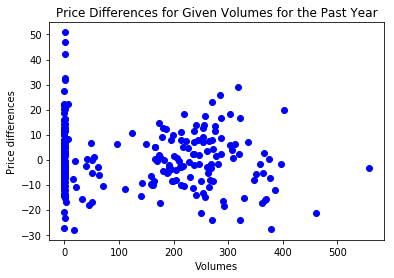

In [8]:
 plt.figure(1)
 plt.plot(train_volumes, train_price_differences, 'bo')
 plt.title('Price Differences for Given Volumes for the Past Year')
 plt.xlabel('Volumes')
 plt.ylabel('Price differences')
 plt.show()
